In [2]:
# import neccessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv('advertising.csv')
df.dropna(inplace=True, axis=1)
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,0
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,0
4,68.37,35,73889.99,225.58,0


In [4]:
# Scale data
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

In [5]:
#  Principal Component Analysis
pca = PCA(n_components=2)
pca.fit(scaled_data)
scaled_pca = pca.transform(scaled_data)
print(scaled_data.shape)
print(scaled_pca.shape)

(1000, 5)
(1000, 2)


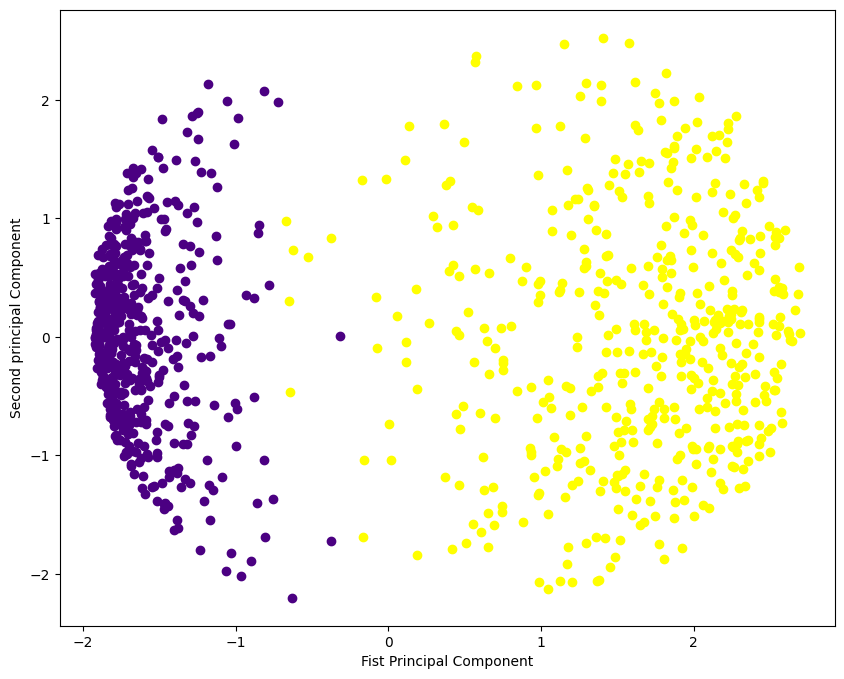

In [6]:
# visualized plot: method 1
plt.figure(figsize=(10, 8))
legend = df['Clicked on Ad']

colors = {0: '#4B0082', 1: '#FFFF00'}

# use a for-loop to set color for each data point
for t in np.unique(legend):
    ix = np.where(legend == t)
    plt.scatter(scaled_pca[ix, 0], scaled_pca[ix, 1], c=colors[t])

# State the scatterPlot labels
plt.xlabel('Fist Principal Component')
plt.ylabel('Second principal Component')
plt.show()

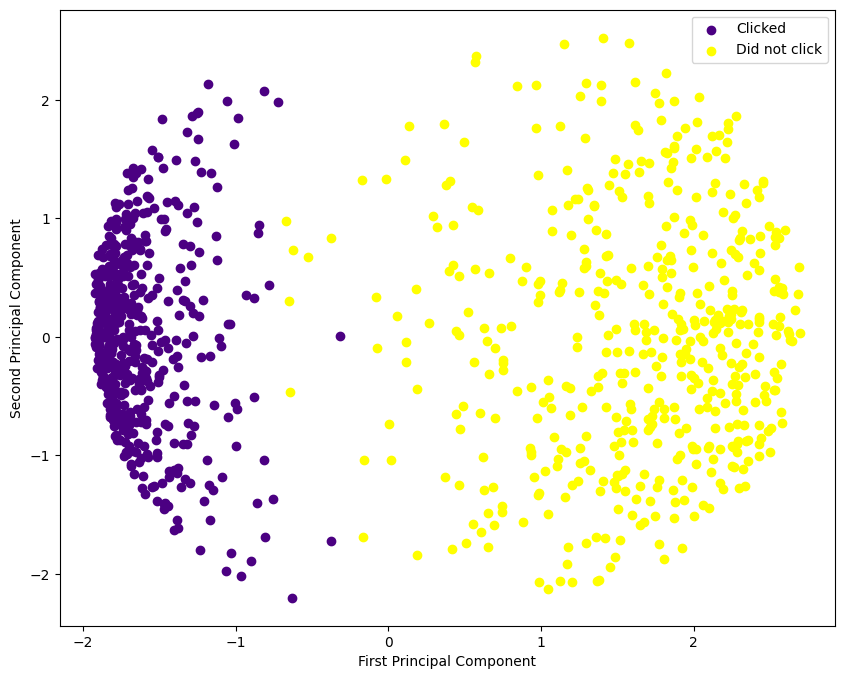

In [7]:
# visualized plot: method 2
plt.figure(figsize=(10, 8))
legend = df['Clicked on Ad']

colors = {0: '#4B0082', 1: '#FFFF00'}
labels = {0: 'Clicked', 1: 'Did not click'}

# Use a for-loop to set color for each data point
for t in np.unique(legend):
    ix = np.where(legend==t)
    plt.scatter(scaled_pca[ix, 0], scaled_pca[ix, 1], c=colors[t], label=labels[t])

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()

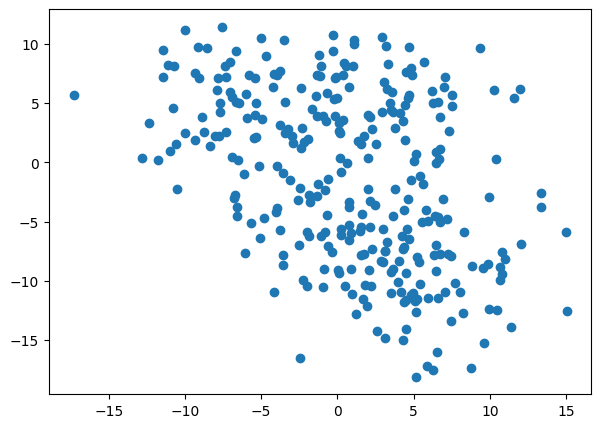

In [8]:
# Create blobs
X, y = make_blobs(n_samples=300, n_features=2, centers=4, cluster_std=4, random_state=10)
plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1])

In [9]:
# Set algorithm
model = KMeans(n_clusters=4)
model.fit(X)

/Users/raymondli/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [10]:
# Predict
model_predict = model.predict(X)
centroids = model.cluster_centers_
model.cluster_centers_

array([[ 3.23209343,  4.94623366],
       [ 6.24946744, -9.70847466],
       [-1.01492539, -5.23271226],
       [-7.03502629,  4.80055552]])

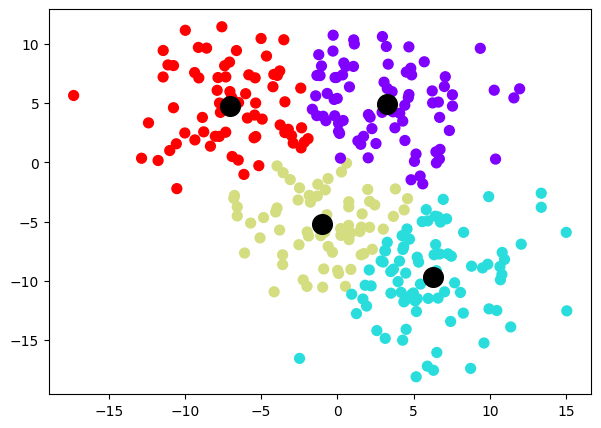

In [11]:
# Visualize the centroid coordinate
plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], c=model_predict, s=50, cmap='rainbow')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=1)

/Users/raymondli/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/raymondli/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/raymondli/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/raymondli/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

/Users/raymondli/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/raymondli/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/raymondli/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/raymondli/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

/Users/raymondli/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/raymondli/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/raymondli/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/raymondli/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

/Users/raymondli/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/raymondli/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/raymondli/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/raymondli/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

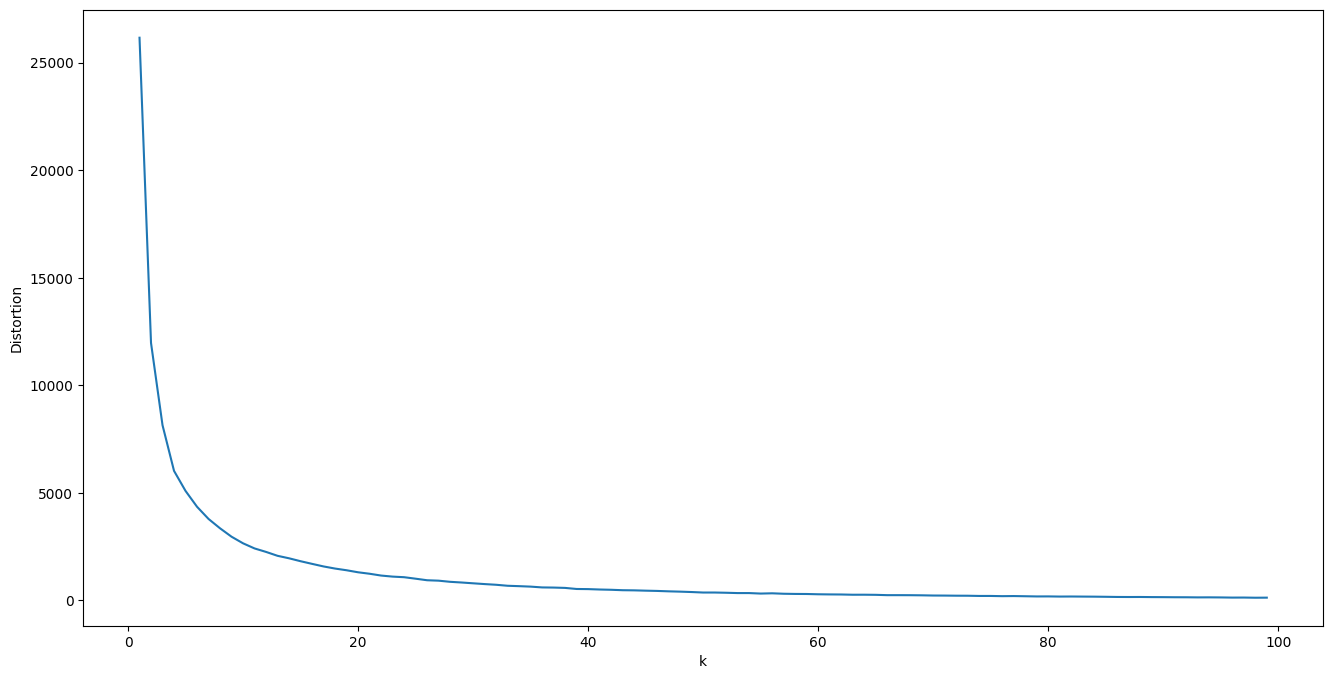

In [12]:
# find the optimial number of cluster
distortions = []
K = range(1, 100)
for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X, y)
    distortions.append(model.inertia_)

plt.figure(figsize=(16, 8))
plt.plot(K, distortions)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.show()

In [13]:
X = df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']]
y = df[['Clicked on Ad']]

In [14]:
# split the data into training and testing data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, shuffle=True)